Notebook Link : https://colab.research.google.com/drive/1aPMwDMfgElB6xZB1j5mdLD7vQYp6qQAh#scrollTo=upYIERe-z6Tc

# PREDICTING HOSPITAL READMISSION FOR DIABETIC PATIENTS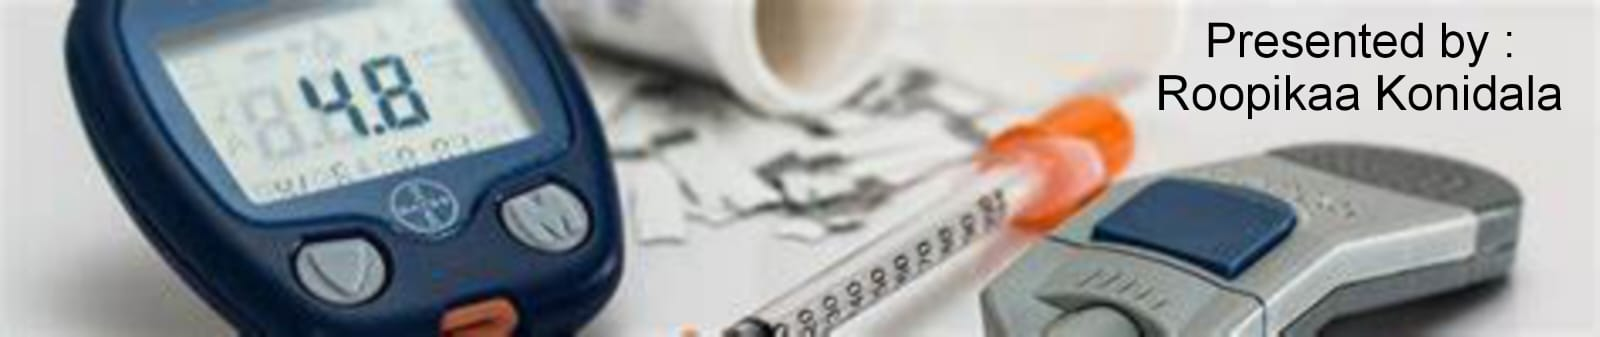

**DIABETIC PATIENTS RE-ADMISSION PREDICTION**

(Identify factors leading to high readmissions of diabetic patient within 30 days)

-Presented by Roopikaa Konidala

# About The DataSet

**About the DataSet**

Diabetes 130-US hospitals for years 1999-2008 Data Set

Diabetes is a chronic condition that can cause numerous kinds of health problems and significantly affect quality of life. While many diabetes individuals manage their health complications with diet and exercise, others require drugs to maintain their blood glucose levels. According to a study paper titled "The relationship between diabetes mellitus and 30-day readmission rates," diabetes mellitus (DM) affects 9.3% of the US population, with 28% of cases remaining undiagnosed. In recent years, government organisations and healthcare institutions have placed a greater emphasis on 30-day readmission rates to assess the complexity of their patient populations and enhance quality. Thirty-day readmission rates for hospitalised individuals with diabetes have been shown to range between 14.4 and 22.7%,much graeter than the rate for all the patients in hospital (8.5–13.5%).

**Problem Statement**:To determine the factors that contribute to diabetic patients' high readmission rates within 30 days of discharge, and to predict the high-risk diabetic patients who are most likely to be readmitted within 30 days, so that the quality of care can be improved, as well as the patient's experience, population health, and cost savings by lowering readmission rates. Also, to determine which medications are most helpful in treating diabetes.

**About Variables:** There are two types.

**1 . Independent Variables:** There are 49 Independent Variables, encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, tolazamide, examide, citoglipton, insulin, Glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed.

**2.Dependent Variables:** The dependent variable is categorical.

# DATA COLLECTION

DATA ANALYSIS

Step 1: Import libraries. First, install the necessary libraries to work with the dataset.

In [ ]:
# a. Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
# b. Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# c. Modeling and Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Step 2: Import the Dataset, Install necessary libraries to work with the DataSet

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/diabetic_data.csv', na_values='?', low_memory=False)

In [ ]:
# Display basic info
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# PRE-PROCESSING

In [ ]:
# Replace "?" with NaN for easier handling of missing values
data.replace('?', np.nan, inplace=True)

 missing values are represented as a question mark '?' when I first looked at the data. The library used to read the data (pandas) includes options for specifying which values should be read as missing (NaN).

In [ ]:
data.shape

(101766, 50)

In [ ]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Checking if there are any duplicated rows !!!

In [ ]:
data.duplicated().any()

False

The records reflect individual encounters, thus even if there are no duplicates, a single patient may have many encounters. Let's look at the amount of patients and encounters:

In [ ]:
len(data.encounter_id.unique()), len(data.patient_nbr.unique())

(101766, 71518)

In [ ]:
# Check class distribution
print(data['readmitted'].value_counts())

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


 Our goal is to perform binary classification, determining if the patient would be readmitted early or not, even though the dataset had three classes to predict (early readmitted is regarded if readmission was in < 30 days).

In [ ]:
# Binary encoding for the target variable
data['readmitted'] = data['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# EXPLORATORY DATA ANALYSIS [EDA]

Our objective is to predict whether a patient would need to be readmitted for diabetes treatment and when (less than 30 days, more than 30 days).

Assuming that classes are not balanced, let's look into this:

<Axes: title={'center': 'Distribution of Predicted Classes'}, ylabel='count'>

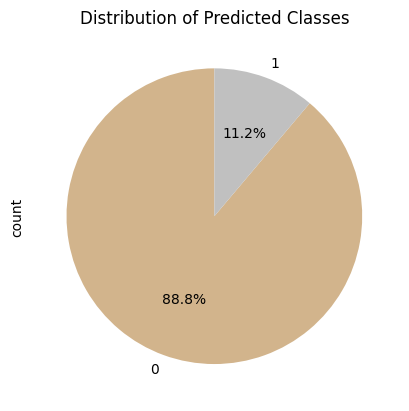

In [ ]:
colors= ['tan', 'silver', '#ffb3ba']
data.readmitted.value_counts().plot(
    kind='pie',
    colors=colors,
    title='Distribution of Predicted Classes',
    autopct='%1.1f%%',
    startangle=90
)

our goal to binary classification, determining if the patient would be readmitted early or not, even though the dataset had three classes to predict (early readmitted is regarded if readmission was in < 30 days).

In [ ]:
data.readmitted.value_counts()

,count
readmitted,
0,90409
1,11357


As we can see, there is a significant imbalance in the data, with only around 10% falling into the small positive class.We can use SMOTE Technique if we want .

**Missing values**

We could notice that there are missing values from the data's first perspective. Additionally, several rows had None values, which indicate that no measurement was made. When predicting patient readmission, the information about not performing the measurement can be useful. In certain situations, a None value does not indicate a missing value.

Let's examine which columns include missing values and in what quantity (the bar shows the percentage of available data; the lower the bar, the more missing values there are):

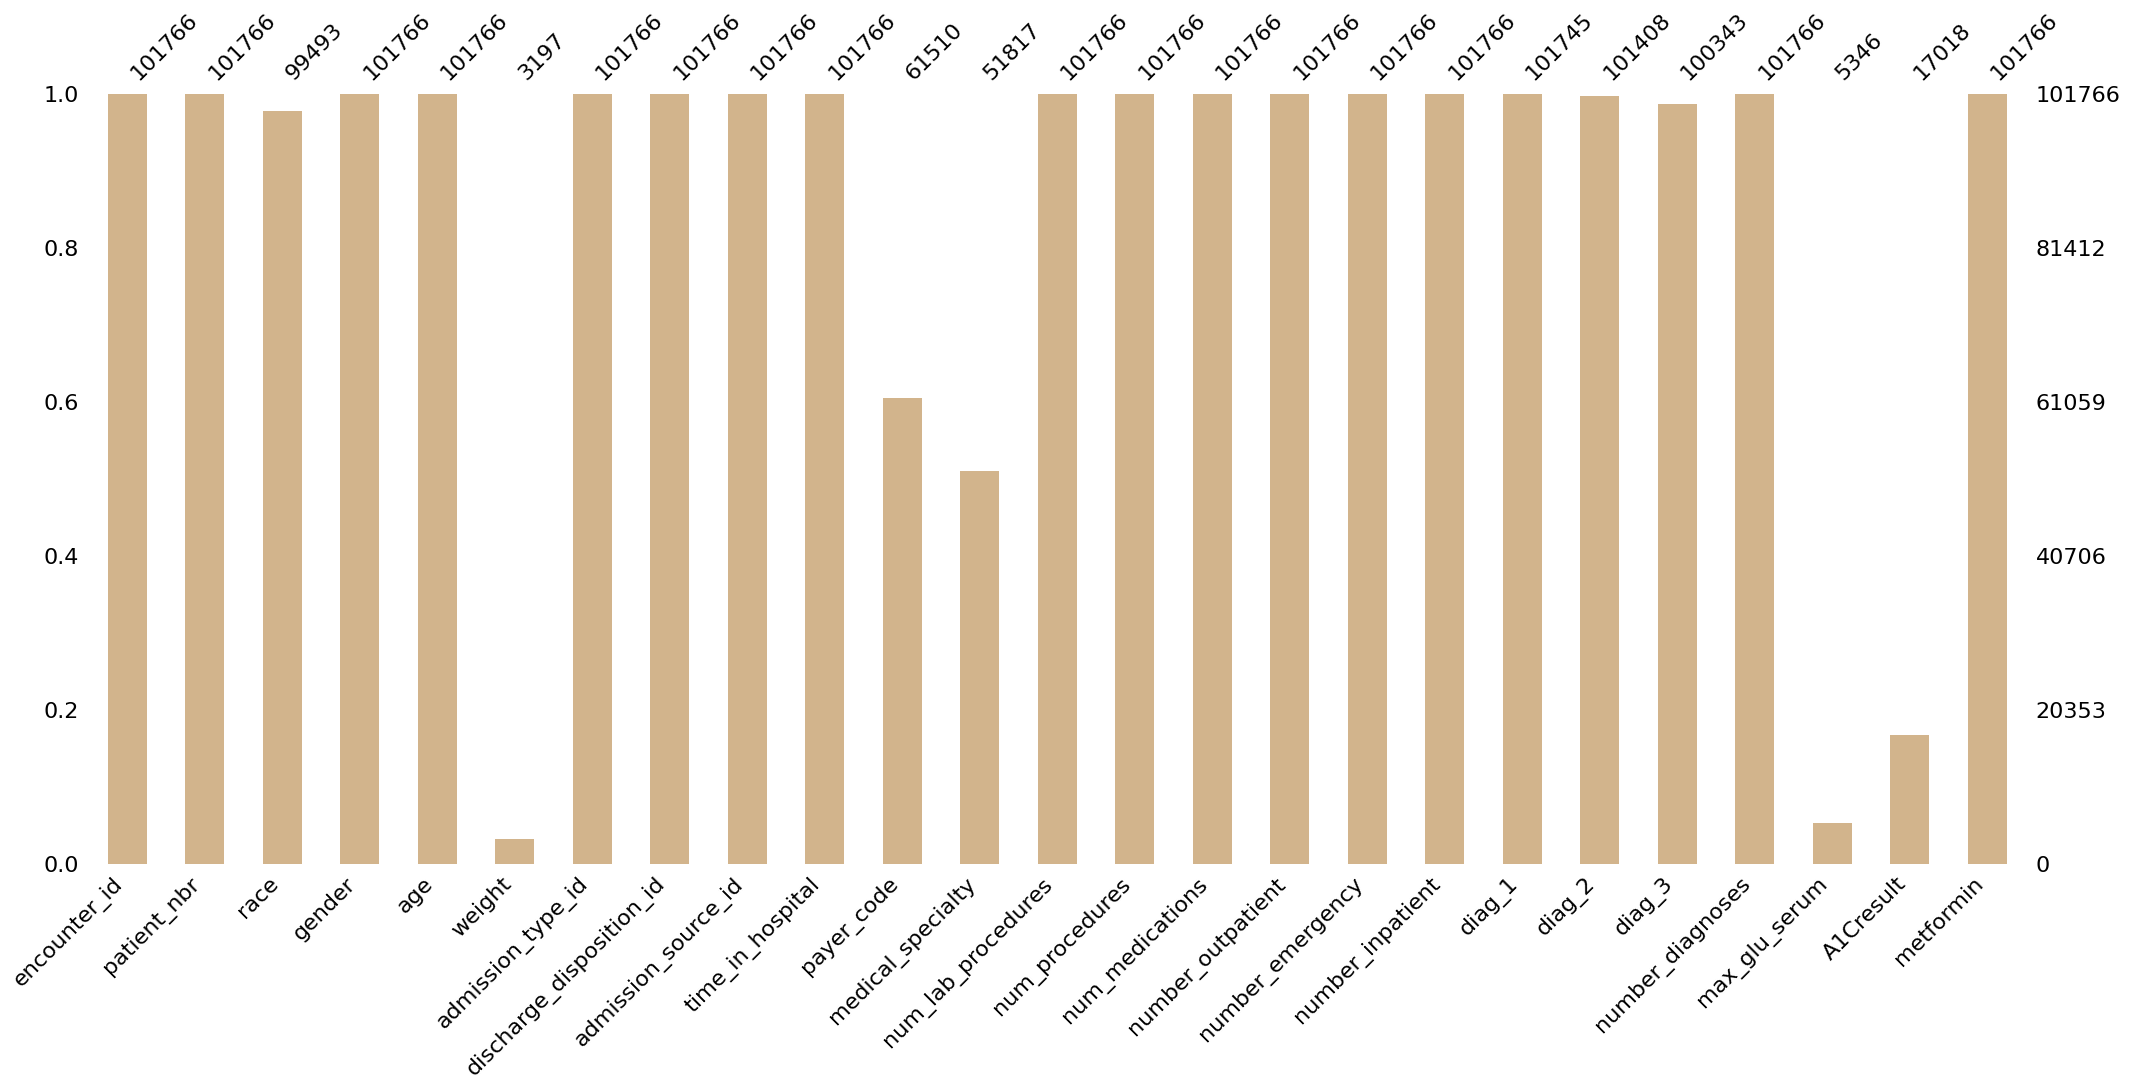

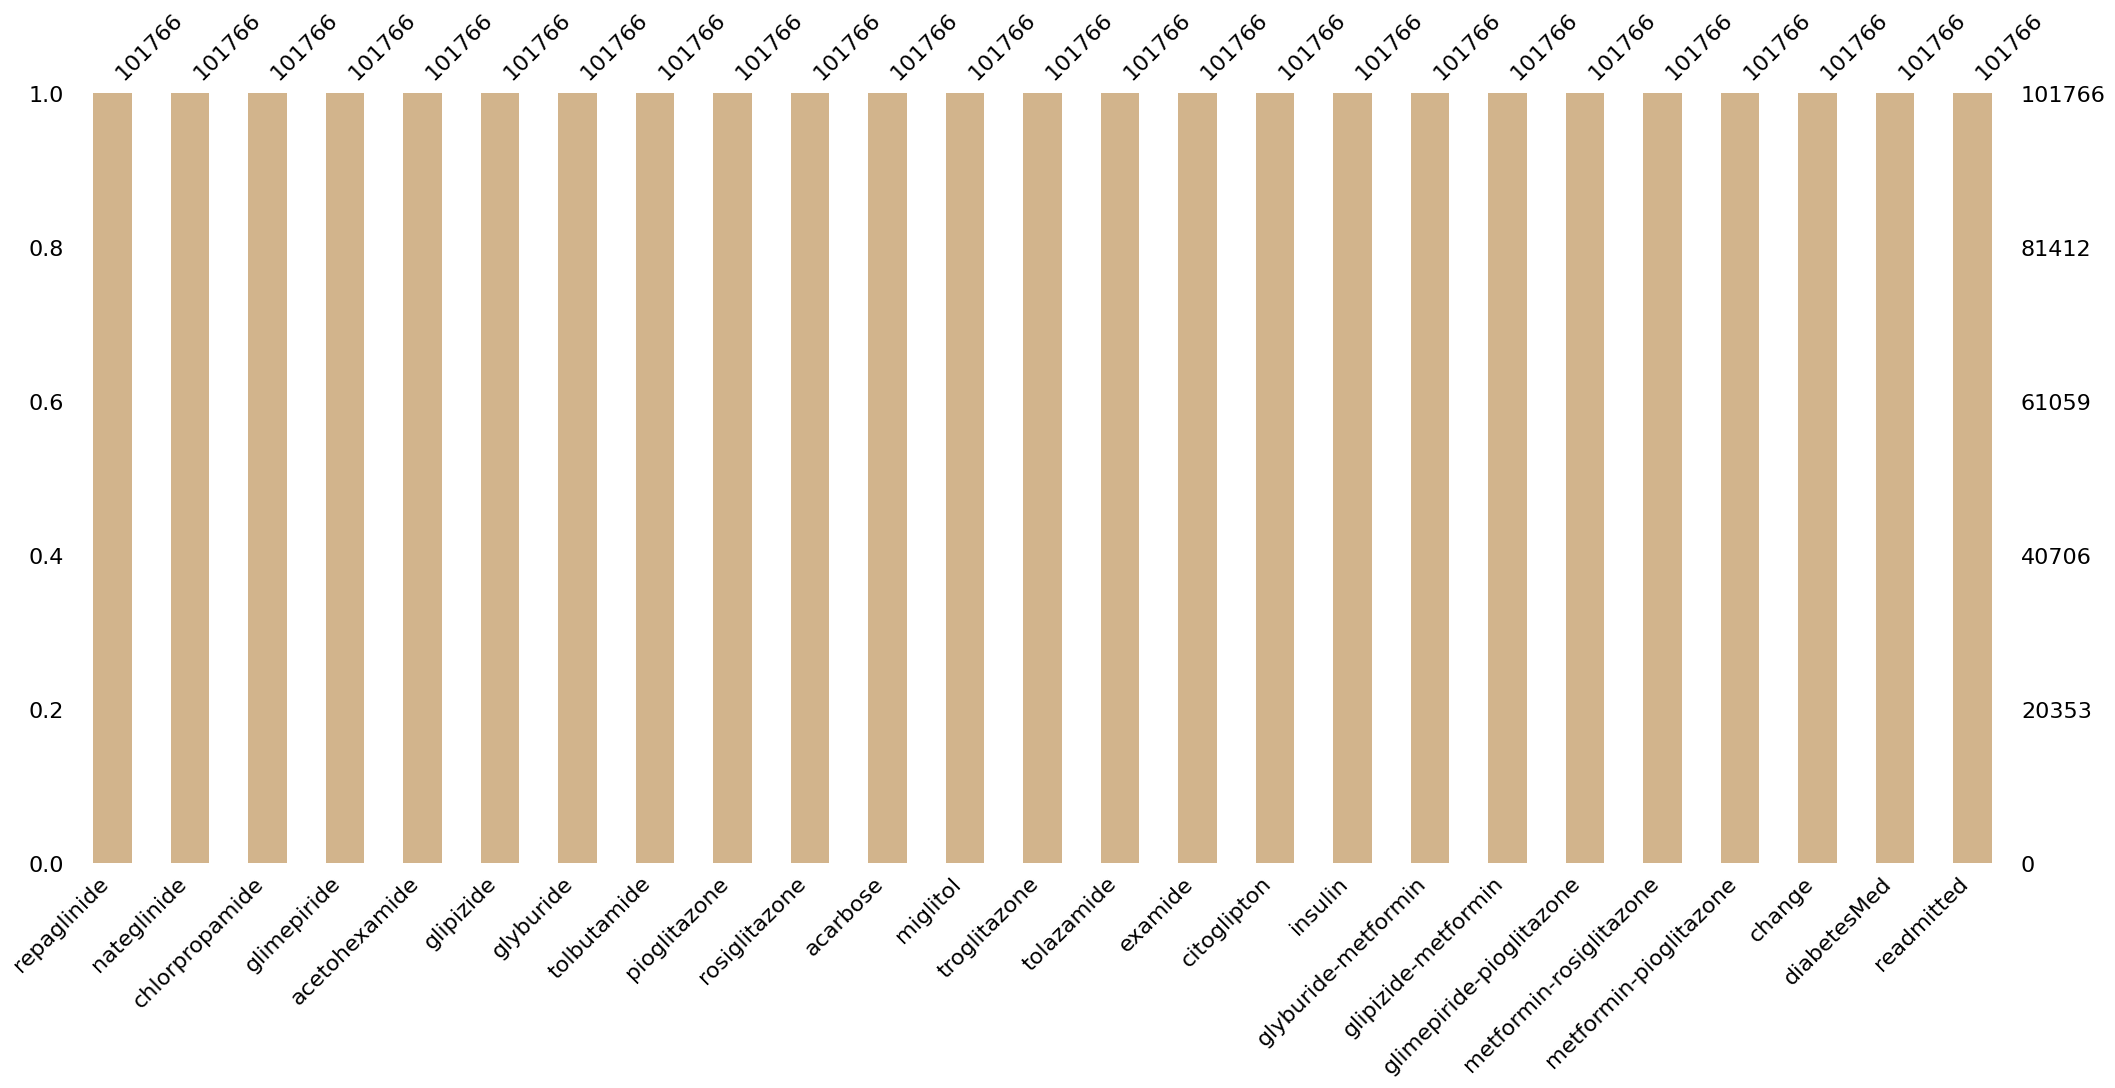

In [ ]:
# Divide columns to 2 groups
column_groups = np.array_split(data.columns, 2)
for columns in column_groups:
    msno.bar(data[columns], color="tan")
    plt.show()

The majority of the properties, as we can see, have no missing values. How many values are missing from each attribute, and which attributes contain missing values?

In [ ]:
for column in data.columns:
    missing_count = len(data[column][data[column].isna()])
    missing_percentage = round(missing_count / len(data) * 100, 2)
    if missing_count > 0:
        print(f'{column}: {missing_count} ({missing_percentage}%)')

race: 2273 (2.23%)
weight: 98569 (96.86%)
payer_code: 40256 (39.56%)
medical_specialty: 49949 (49.08%)
diag_1: 21 (0.02%)
diag_2: 358 (0.35%)
diag_3: 1423 (1.4%)
max_glu_serum: 96420 (94.75%)
A1Cresult: 84748 (83.28%)


Only seven properties, as we can see, lack values.

It would likely be preferable to remove the entire payer_code and medical_specialty columns and avoid using such properties when it comes to weight. The reason is that there aren't enough values to fill in the gaps and generalise.

Only a small percentage (about 2%) of the race data are missing, thus those numbers can be filled in.



In [ ]:
# For numeric features, fill with median
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

In [ ]:
# For categorical features, fill with mode
categorical_cols = data.select_dtypes(include='object').columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

**Attribute Analysis**

We shall examine some of the significant attribute individually in this section.

In [ ]:
def barplot_per_classes(data, attribute, groupby, title=None, ticks_rotation=0, topn=None, ax=None):
    """
    Draw barplot of attribute per each class.

    :param data: dataframe with data to be drawn on barplot.
    :param attribute: name of attribute to be drawn on barplot.
    :param groupby: name of attribute with predicted classes.
    :param title: title of plot.
    :param ticks_rotation: rotation of x-ticks (labels).
    :param topn: top n classes to be drawn on the plot.
    :param ax: matplotlib Axes object to draw the plot onto.
    """
    uniq_values = data[attribute].value_counts().head(topn).index
    data = data[data[attribute].isin(uniq_values)]
    datas = data.groupby(groupby)[attribute].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
    sns.barplot(attribute, 'percentage', hue=groupby, data=data, ax=ax)
    plt.xticks(rotation=ticks_rotation)
    plt.title(title)


def kdeplot_per_classes(data, attribute, groupby, title=None, ticks_rotation=0, ax=None):
    """
    Draw kdeplot of attribute per each class.

    :param data: dataframe with data to be drawn on kdeplot.
    :param attribute: name of attribute to be drawn on kdeplot.
    :param groupby: name of attribute with predicted classes.
    :param title: title of plot.
    :param ticks_rotation: rotation of x-ticks (labels).
    :param ax: matplotlib Axes object to draw the plot onto.
    """
    for x in data[groupby].unique():
        sns.kdeplot(data[data[groupby] == x][attribute], label=x, shade=True, shade_lowest=False, ax=ax)
    plt.title(title)
    plt.xticks(rotation=ticks_rotation)

def boxplot_per_classes(data, attribute, groupby, title=None, ticks_rotation=0, ax=None):
    """
    Draw boxplot of attribute per each class.

    :param data: dataframe with data to be drawn on boxplot.
    :param attribute: name of attribute to be drawn on boxplot.
    :param groupby: name of attribute with predicted classes.
    :param title: title of plot.
    :param ticks_rotation: rotation of x-ticks (labels).
    :param ax: matplotlib Axes object to draw the plot onto.
    """
    sns.boxplot(x=groupby, y=attribute, data=data, ax=ax)
    plt.title(title)
    plt.xticks(rotation=ticks_rotation)



In [ ]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Additionally, several parameters (such as encounter_id and patient_nbr) have no bearing on our forecast. These characteristics won't be examined.

Predicted classes (1 and 0; early readmitted or not) will be used to analyse all attributes. Because of the unbalanced classes, graphs for categorical attributes display a normalised percentage of values.

Not every plot or outcome has an explanation or description. In situations where no noteworthy or intriguing findings were reached, explanations were omitted. In following stages (prediction and feature selection), the value of such traits will be demonstrated.

NOTE: All attribute descriptions are based on or inspired by the original paper [1].

race of the patient.

Principles:

American, Hispanic, Asian, African, Caucasian, and other.

In [ ]:
data.race.value_counts()

,count
race,
Caucasian,78372
AfricanAmerican,19210
Hispanic,2037
Other,1506
Asian,641


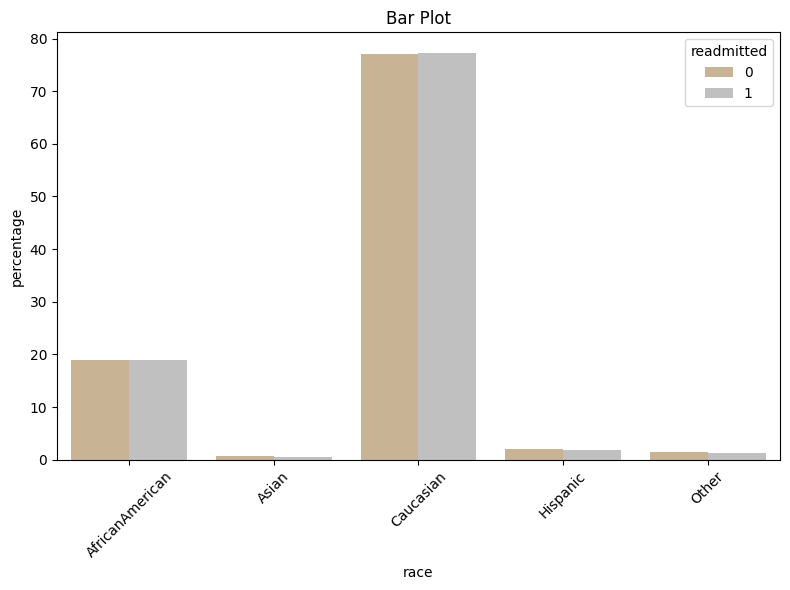

In [ ]:
def barplot_per_classes(data, attribute, groupby, title='Bar Plot', ticks_rotation=45, topn=None, ax=None):
    datas = data.groupby([groupby, attribute]).size().reset_index(name='count')
    datas['percentage'] = datas['count'] / datas.groupby(groupby)['count'].transform('sum') * 100
    plt.figure(figsize=(8, 6))
    sns.barplot(x=attribute, y='percentage', hue=groupby, data=datas, palette=['tan','silver'], ax=ax)
    plt.xticks(rotation=ticks_rotation)
    plt.title(title)
    plt.tight_layout()
    plt.show()
barplot_per_classes(data, 'race', 'readmitted')


**Gender** (Gender of patient).

In [ ]:
data.gender.value_counts()


,count
gender,
Female,54708
Male,47055
Unknown/Invalid,3


Three of the values are also unknown or invalid, as can be seen. Similar to how NaN values are filled in, those three values ought to be changed to male or female.

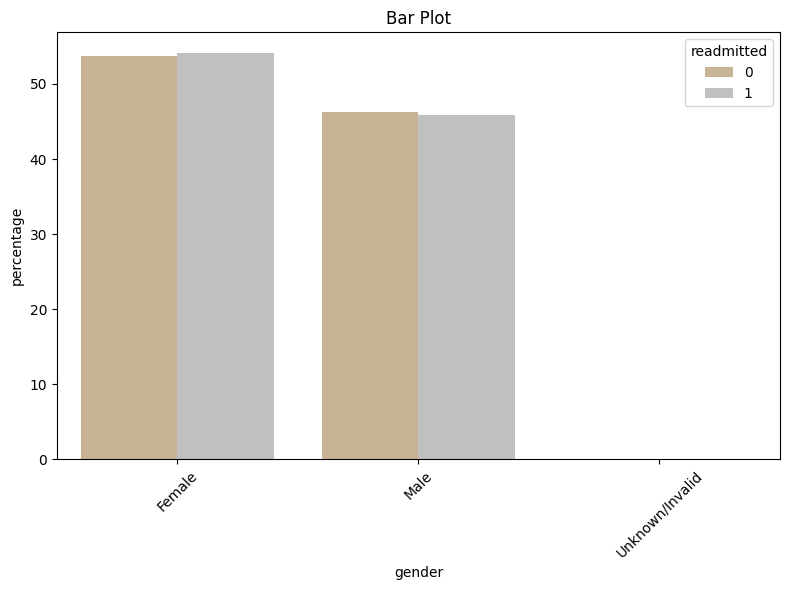

In [ ]:
def barplot_per_classes(data, attribute, groupby, title='Bar Plot', ticks_rotation=45, topn=None, ax=None, palette=None):
    datas = data.groupby([groupby, attribute]).size().reset_index(name='count')
    datas['percentage'] = datas['count'] / datas.groupby(groupby)['count'].transform('sum') * 100
    plt.figure(figsize=(8, 6))
    sns.barplot(x=attribute, y='percentage', hue=groupby, data=datas, palette=palette, ax=ax)
    plt.xticks(rotation=ticks_rotation)
    plt.title(title)
    plt.tight_layout()
    plt.show()
barplot_per_classes(data, 'gender', 'readmitted', palette=['tan', 'silver'])


**Age** (The patient's age. 10 year intervals are used to group them: [(0,10), (10,20),..., (90,100)].

In [ ]:
data.age.value_counts()

,count
age,
[70-80),26068
[60-70),22483
[50-60),17256
[80-90),17197
[40-50),9685
[30-40),3775
[90-100),2793
[20-30),1657
[10-20),691


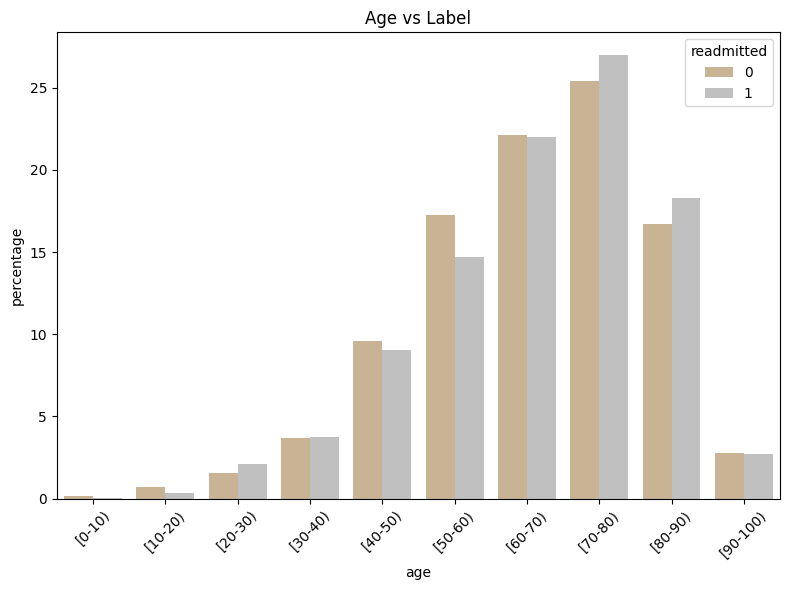

In [ ]:
def barplot_per_classes(data, attribute, groupby, title='Bar Plot', ticks_rotation=45, topn=None, ax=None):
    datas = data.groupby([groupby, attribute]).size().reset_index(name='count')
    datas['percentage'] = datas['count'] / datas.groupby(groupby)['count'].transform('sum') * 100
    plt.figure(figsize=(8, 6))
    sns.barplot(x=attribute, y='percentage', hue=groupby, data=datas, palette=['tan', 'silver'], ax=ax)
    plt.xticks(rotation=ticks_rotation)
    plt.title(title)
    plt.tight_layout()
    plt.show()
barplot_per_classes(data, 'age', 'readmitted', title='Age vs Label', ticks_rotation=45)


The majority of patients are older, according to the age feature. Additionally, there is a trend towards an increase in the number of older patients who are readmitted early. One of the risk factors for early readmission is age.

To obtain a checkboxplot and numerical representation, let's attempt to transform the age interval into a middle value:

In [ ]:
def convert_age(age):
    """
    Convert age from interval into middle value.

    :param age: age interval.
    :return: middle value of age interval.
    """
    age = age[1:-1]
    lower_boundary = int(age.split('-')[0])
    upper_boundary = int(age.split('-')[1])
    return (upper_boundary + lower_boundary) / 2

In [ ]:
data['age_middle_value'] = data['age'].apply(lambda x: convert_age(x))

<ipython-input-307-93ce7ff7e188>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=groupby, y=attribute, data=data, palette=['tan', 'silver'], ax=ax)


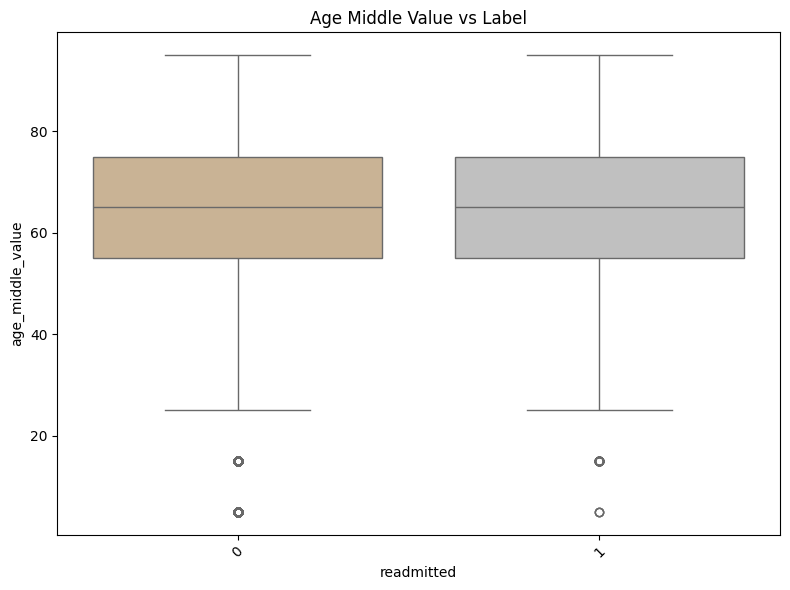

In [ ]:
def boxplot_per_classes(data, attribute, groupby, title='Box Plot', ticks_rotation=45, ax=None):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=groupby, y=attribute, data=data, palette=['tan', 'silver'], ax=ax)
    plt.xticks(rotation=ticks_rotation)
    plt.title(title)
    plt.tight_layout()
    plt.show()
boxplot_per_classes(data, 'age_middle_value', 'readmitted', title='Age Middle Value vs Label', ticks_rotation=45)


From the boxplot, we can see that there is only a minor difference at first sight.

**Weight**

 (Pounds of the patient's weight). grouped in increments of 25 pounds.

As previously stated, there are missing values in this column practically everywhere. We would prefer to drop it during the preprocessing stage.

In [ ]:
data.weight.value_counts()

,count
weight,
[75-100),99905
[50-75),897
[100-125),625
[125-150),145
[25-50),97
[0-25),48
[150-175),35
[175-200),11
>200,3


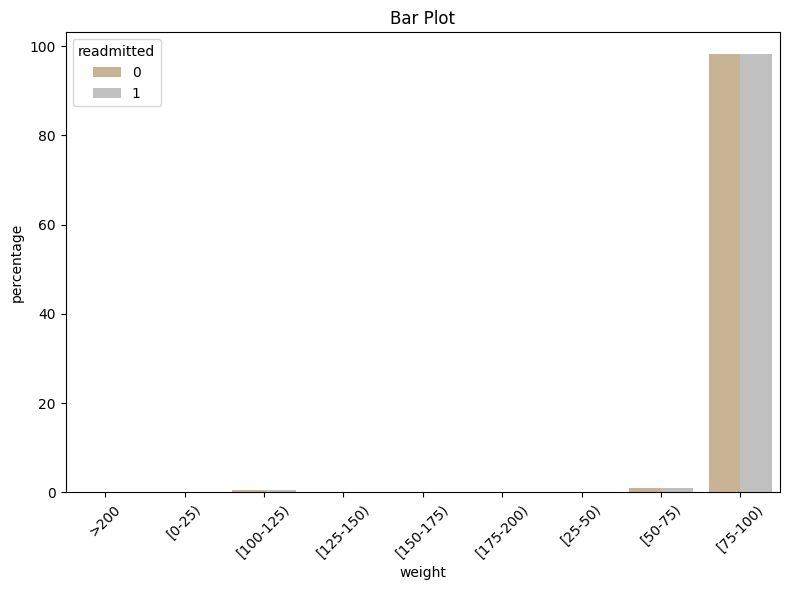

In [ ]:
barplot_per_classes(data, 'weight', 'readmitted')

**admission_type_id**

 (Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available).ot_per_classes(data, 'weight', 'label')

In [ ]:
data.admission_type_id.value_counts()

,count
admission_type_id,
1,53990
3,18869
2,18480
6,5291
5,4785
8,320
7,21
4,10


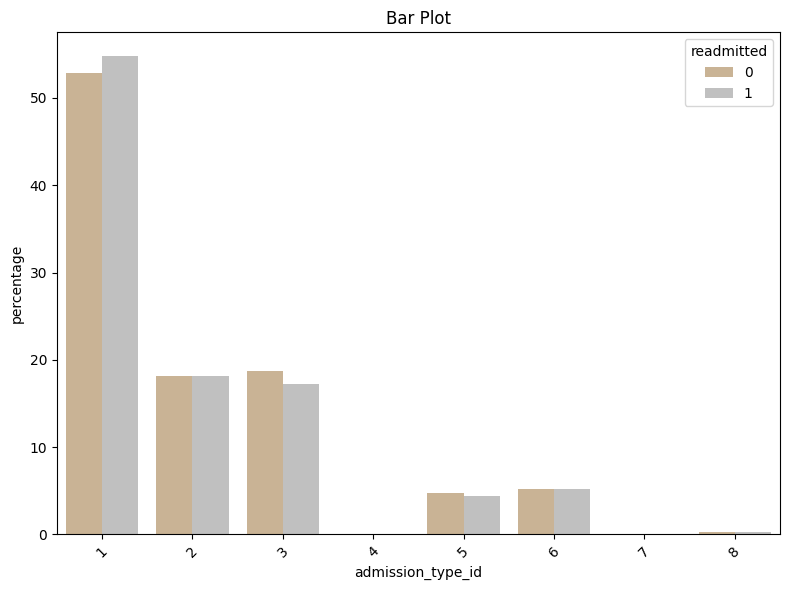

In [ ]:
barplot_per_classes(data, 'admission_type_id', 'readmitted')

**time_in_hospital**

 Integer number of days between admission and discharge.

<ipython-input-297-8d2b9ebae7da>:33: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[groupby] == x][attribute], label=x, shade=True, shade_lowest=False, ax=ax)
<ipython-input-297-8d2b9ebae7da>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[groupby] == x][attribute], label=x, shade=True, shade_lowest=False, ax=ax)
<ipython-input-297-8d2b9ebae7da>:33: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[groupby] == x][attribute], label=x, shade=True, shade_lowest=False, ax=ax)
<ipython-input-297-8d2b9ebae7da>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

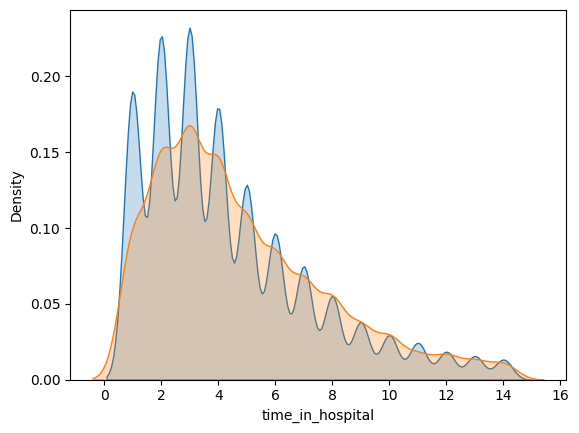

In [ ]:
kdeplot_per_classes(data, 'time_in_hospital', 'readmitted')

<ipython-input-307-93ce7ff7e188>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=groupby, y=attribute, data=data, palette=['tan', 'silver'], ax=ax)


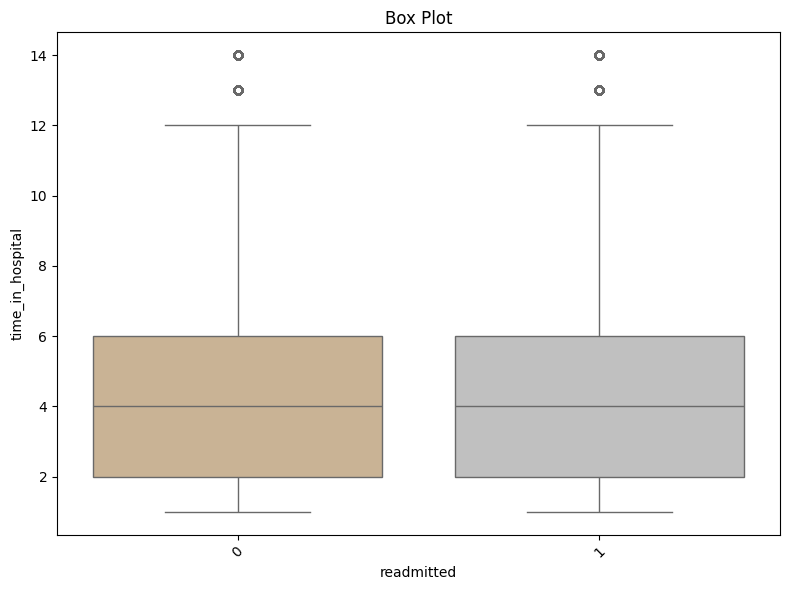

In [ ]:
boxplot_per_classes(data, 'time_in_hospital', 'readmitted')

**medical_specialty**

 The admitting physician's speciality, represented by an integer with 84 different values, such as cardiology, internal medicine, family general practice, and surgery.

Since there are 84 different values, we will just look at the top 10:

In [ ]:
data.medical_specialty.value_counts()

,count
medical_specialty,
InternalMedicine,64584
Emergency/Trauma,7565
Family/GeneralPractice,7440
Cardiology,5352
Surgery-General,3099
...,...
Perinatology,1
Neurophysiology,1
Psychiatry-Addictive,1


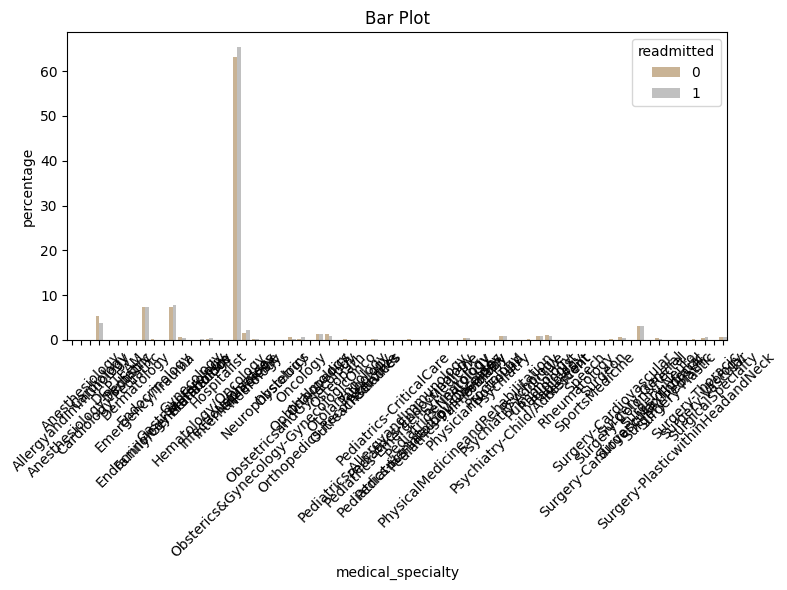

In [ ]:
barplot_per_classes(data, 'medical_specialty', 'readmitted', ticks_rotation=45, topn=10)

**num_lab_procedures**

Number of lab tests performed during the encounter.

In [ ]:
data.num_lab_procedures.value_counts()

,count
num_lab_procedures,
1,3208
43,2804
44,2496
45,2376
38,2213
...,...
120,1
132,1
121,1


<ipython-input-297-8d2b9ebae7da>:33: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[groupby] == x][attribute], label=x, shade=True, shade_lowest=False, ax=ax)
<ipython-input-297-8d2b9ebae7da>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[groupby] == x][attribute], label=x, shade=True, shade_lowest=False, ax=ax)
<ipython-input-297-8d2b9ebae7da>:33: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[groupby] == x][attribute], label=x, shade=True, shade_lowest=False, ax=ax)
<ipython-input-297-8d2b9ebae7da>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

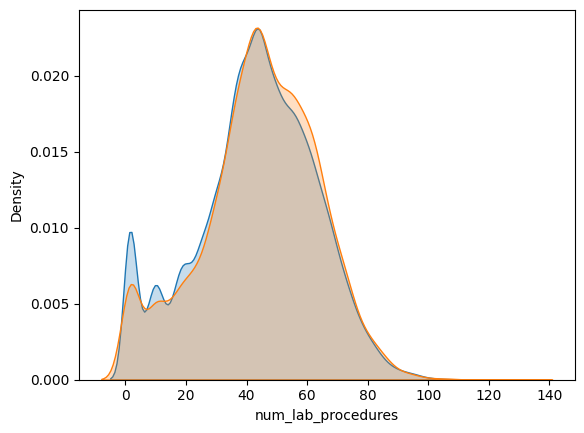

In [ ]:
kdeplot_per_classes(data, 'num_lab_procedures', 'readmitted')

**num_procedures**

 Number of procedures (other than lab tests) performed during the encounter.

In [ ]:
data.num_procedures.value_counts()

,count
num_procedures,
0,46652
1,20742
2,12717
3,9443
6,4954
4,4180
5,3078


<ipython-input-307-93ce7ff7e188>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=groupby, y=attribute, data=data, palette=['tan', 'silver'], ax=ax)


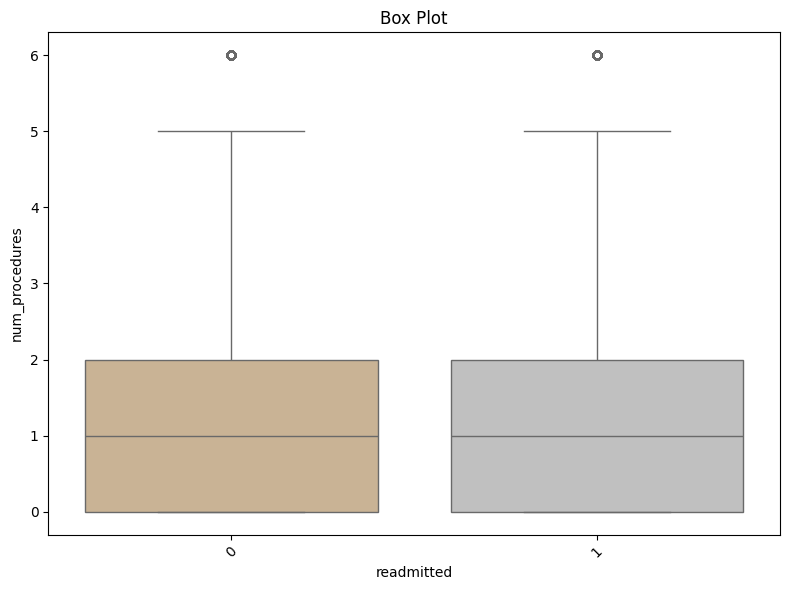

In [ ]:
boxplot_per_classes(data, 'num_procedures', 'readmitted')

**num_medications**

Number of distinct generic names administered during the encounter.

<ipython-input-297-8d2b9ebae7da>:33: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[groupby] == x][attribute], label=x, shade=True, shade_lowest=False, ax=ax)
<ipython-input-297-8d2b9ebae7da>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[groupby] == x][attribute], label=x, shade=True, shade_lowest=False, ax=ax)
<ipython-input-297-8d2b9ebae7da>:33: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data[groupby] == x][attribute], label=x, shade=True, shade_lowest=False, ax=ax)
<ipython-input-297-8d2b9ebae7da>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

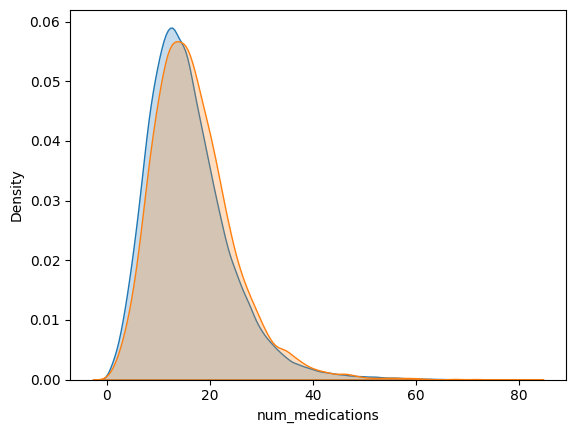

In [ ]:
kdeplot_per_classes(data, 'num_medications', 'readmitted')

Encoding Categorical Features

In [ ]:
# Convert categorical columns to 'category' dtype.
categorical_columns = ['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult',
                       'admission_type_id', 'discharge_disposition_id',
                       'admission_source_id', 'change', 'diabetesMed',
                       'insulin', 'metformin']

for col in categorical_columns:
    if col in data.columns:
        data[col] = pd.Categorical(data[col])

Converting categorical features into category type.

# FEATURE SELECTION

Selecting Features

In [ ]:
# Define features for selection
selected_features = [
    'number_outpatient', 'number_emergency', 'number_inpatient',
    'number_diagnoses', 'insulin', 'metformin', 'race', 'gender', 'age',
    'max_glu_serum', 'A1Cresult', 'admission_type_id', 'discharge_disposition_id',
    'admission_source_id', 'change', 'diabetesMed'
]

**Splitting the Data**

X: Predictor variables.
y: Target variable (readmitted).

In [ ]:
# Split the data into features (X) and target (y)
X = data[selected_features]
y = data['readmitted']

Split data into training (80%) and test (20%) sets.

In [ ]:
# Split into training and test sets (80% training, 20% testing with stratification)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# MODELS

# XG Boost

I chose XG Boost beacuse it is Proven for its effectiveness in handeling the data and gives Good Accuracy when comapred to other models.

In [ ]:
# Training XGBoost Classifier .
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    enable_categorical=True,
    random_state=42
)

In [ ]:
# Fitting the model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:34:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Making Predictions

In [ ]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

y_pred: Class predictions (0 or 1).

y_pred_prob: Predicted probabilities for class 1 (used for ROC curve).

**Model Evaluation**

In [ ]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8876879237496316
AUC-ROC: 0.670087095092342

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     18083
           1       0.45      0.03      0.06      2271

    accuracy                           0.89     20354
   macro avg       0.67      0.51      0.50     20354
weighted avg       0.84      0.89      0.84     20354



The XG Boost model produced 89% Accuracy .

In [ ]:
# Plotting ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

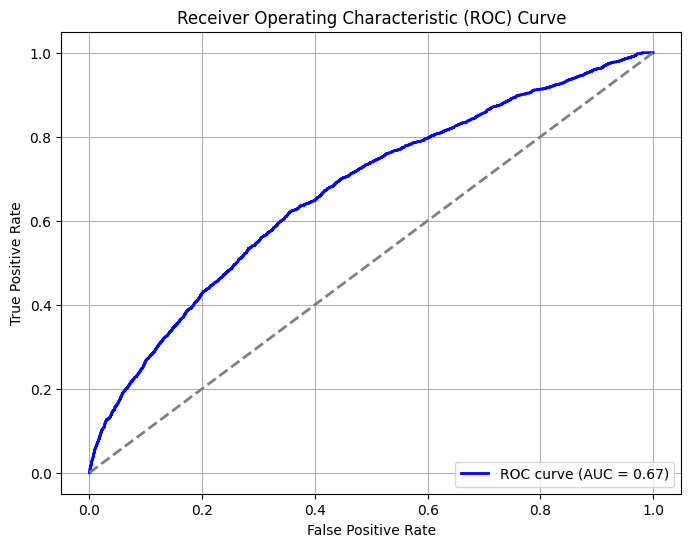

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

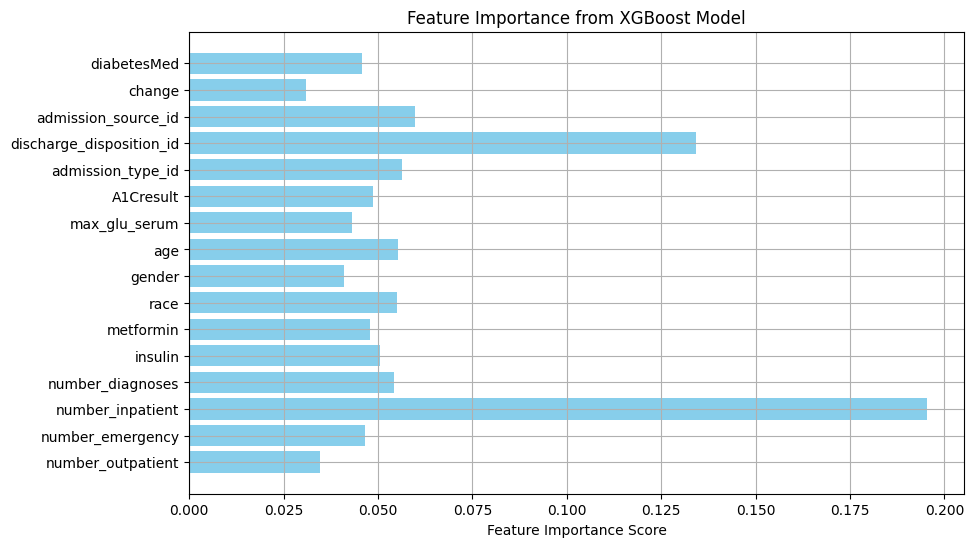

In [ ]:
# Visualizing Feature Importance .
importance = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(selected_features, importance, color='skyblue')
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance from XGBoost Model')
plt.grid()
plt.show()

Visualizing the relative importance of features for predictions.

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[17999    84]
 [ 2202    69]]


Summarizing true positives, false positives, true negatives, and false negatives.

I Chose to do Logistice Regression after XG Boost as i thought I will compare the performance of XG Boost model and validate the features with a simpler and more interpretable model.

# Logistic Regression

In [ ]:
# Identify categorical columns
categorical_features = X_train.select_dtypes(include=['category', 'object']).columns

In [ ]:
# Applying OneHotEncoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'  # Leave other columns (numeric) as is
)

In [ ]:
# Transforming the training and testing data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [ ]:
# Initializing and train logistic regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_encoded, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
# Making predictions
y_pred = model.predict(X_test_encoded)
y_pred_prob = model.predict_proba(X_test_encoded)[:, 1]

**Model Evaluation**

In [ ]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6735285447577871
AUC-ROC: 0.6755247276654472

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.69      0.79     18083
           1       0.18      0.56      0.28      2271

    accuracy                           0.67     20354
   macro avg       0.55      0.62      0.53     20354
weighted avg       0.84      0.67      0.73     20354



The Accuracy I got for the Logistic Regression Model is : 67 % . So, I conclude that the XG Boost Model has given me a Good Accuracy .

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[12440  5643]
 [ 1002  1269]]




*   Logistic Regression: Correctly predicted 1269
    minority cases (improved recall).
*  XGBoost: Only 69 out of 2271 minority cases were
    correctly predicted.




# CONCLUSION

**CONCLUSION :**



*   **XGBoost:** High overall accuracy .
*  **Logistic Regression:** Balanced class predictions .




In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Predicting_Hospital_readmission_for_diabetic_Patients.ipynb

[Errno 20] Not a directory: '/content/drive/MyDrive/Colab Notebooks/Predicting_Hospital_readmission_for_diabetic_Patients.ipynb'
/content


In [3]:
!cd '/content/drive/MyDrive/Colab Notebooks'


In [7]:
!ls '/content/drive/MyDrive/Colab Notebooks'


'1_Copy of DS_PROJECT.ipynb'
'Another copy of dsci 633- home work 1.ipynb'
 Assignment_2.ipynb
'Copy of DS Assignment 4.ipynb'
'Copy of DS_Assignment_5.ipynb'
'Copy of DS Assignment.ipynb'
'Copy of DS_FINAL_PROJECT (1).ipynb'
'Copy of DS_FINAL_PROJECT (2).ipynb'
'Copy of DS_FINAL_PROJECT.ipynb'
'Copy of DS_HomeWork 3 (1).ipynb'
'Copy of DS_HomeWork 3.ipynb'
'Copy of DS_PROJECT (1).ipynb'
'Copy of DS_PROJECT.ipynb'
'Copy of Untitled8.ipynb'
'DS Assignment_2.ipynb'
'DS Assignment 4.ipynb'
 DS_Assignment_5.ipynb
'DSCI-633_home work 1.ipynb'
'DSCI- 633_ home work 1.ipynb'
 DSCI-633_HW_1.ipynb
'DS_HomeWork 3.ipynb'
 DS_PROJECT.ipynb
'Model Performance.ipynb'
 Predicting_Hospital_readmission_for_diabetic_Patients.ipynb
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 Untitled4.ipynb
 Untitled5.ipynb
 Untitled6.ipynb
 Untitled7.ipynb
 Untitled8.ipynb


In [8]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [9]:
!git config --global user.name "Roopikaa"
!git config --global user.email "kroopikaa18@gmail,com"



In [10]:
!git clone https://github.com/Roopikaa/Projects

Cloning into 'Projects'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 17.19 MiB | 20.23 MiB/s, done.


In [11]:
!pwd


/content


In [12]:
!ls


drive  Projects  sample_data


In [13]:
!ls /content/Projects


Music_Generator_Using_LSTM
